In [5]:
from sklearn import tree
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np

# task1
iris = datasets.load_iris()
iris_data = iris.data[:, :2] # sepal length and width
iris_targets = iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

[Text(0.36890243902439024, 0.9615384615384616, 'x[0] <= 5.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.0975609756097561, 0.8846153846153846, 'x[1] <= 2.8\ngini = 0.237\nsamples = 52\nvalue = [45, 6, 1]'),
 Text(0.04878048780487805, 0.8076923076923077, 'x[0] <= 4.7\ngini = 0.449\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.024390243902439025, 0.7307692307692307, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07317073170731707, 0.7307692307692307, 'x[0] <= 4.95\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.04878048780487805, 0.6538461538461539, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.024390243902439025, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.07317073170731707, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.0975609756097561, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.14634146341463414, 0.8076923076923077, 'x[0] <= 5.35\ngini = 0.

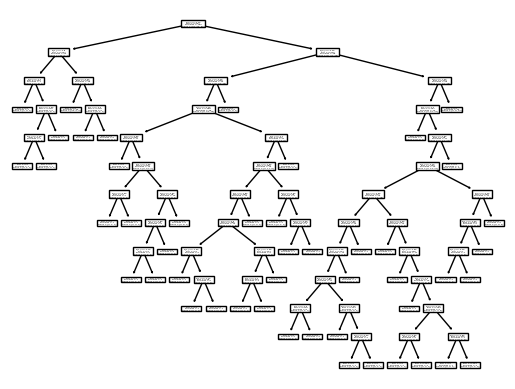

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris_data, iris_targets)
tree.plot_tree(clf)

F1 score for sepal length: 0.7642973856209151.
F1 score for sepal width: 0.6160425163762205.
DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      random_state=RandomState(MT19937) at 0x7F7B1A704B40)


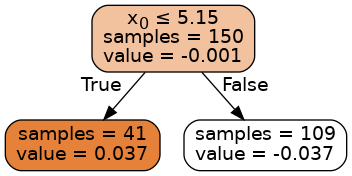

In [7]:
# task2
classifier1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
classifier2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
X1 = iris_data[:, 0].reshape(-1, 1)
X2 = iris_data[:, 1].reshape(-1, 1)
classifier1 = classifier1.fit(X1, iris_targets)
classifier2 = classifier2.fit(X2, iris_targets)

preds1 = classifier1.predict(X1)
preds2 = classifier2.predict(X2)
# print((preds1 == iris_targets).sum() / len(iris_targets))
f1_first_classifier = f1_score(iris_targets, preds1, average='macro')
f1_second_classifier = f1_score(iris_targets, preds2, average='macro')
print(f"F1 score for sepal length: {f1_first_classifier}.\nF1 score for sepal width: {f1_second_classifier}.")


from sklearn.tree import export_graphviz

# Get the tree number 42
sub_tree_42 = classifier1.estimators_[42, 0]
print(sub_tree_42)

# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('./out.png').write_bytes(png)
# Display
Image(png)


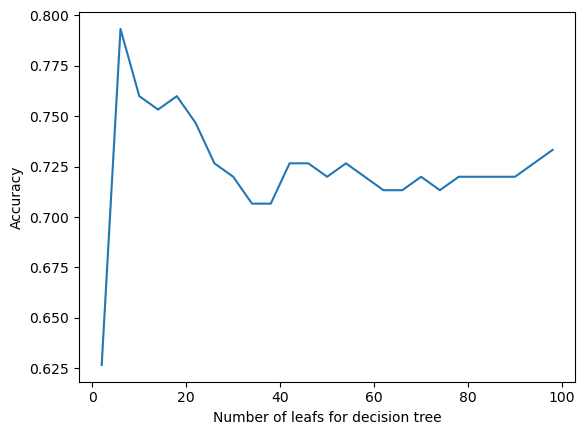

In [8]:
# task3
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

number_of_leafs = np.arange(2, 100, 4)
accuracy_hist = np.array([])

for max_leafs in number_of_leafs:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=max_leafs)
    clf = clf.fit(iris_data, iris_targets)
    scores = cross_val_score(clf, iris_data, iris_targets, cv=5)
    accuracy_hist = np.append(accuracy_hist, np.array([scores.mean()]))
    # print("%0.2f accuracy with a standard deviation of %0.2f for %d max leafs" % (scores.mean(), scores.std(), max_leafs))

plt.xlabel("Number of leafs for decision tree")
plt.ylabel("Accuracy")
plt.plot(number_of_leafs, accuracy_hist)

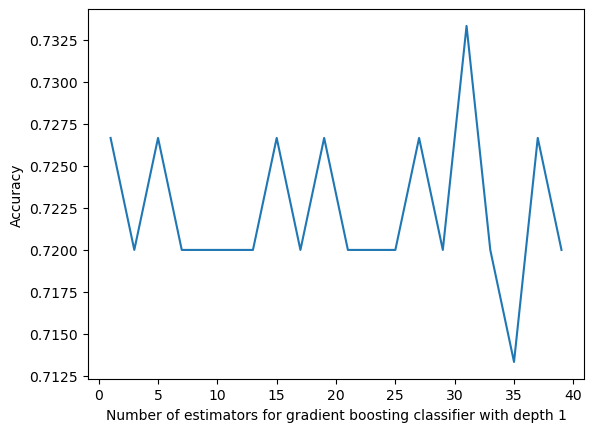

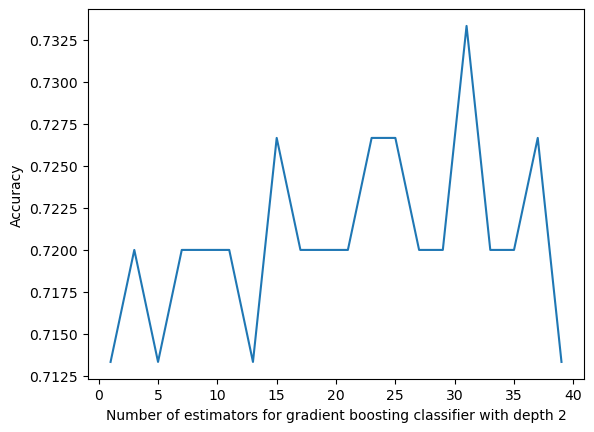

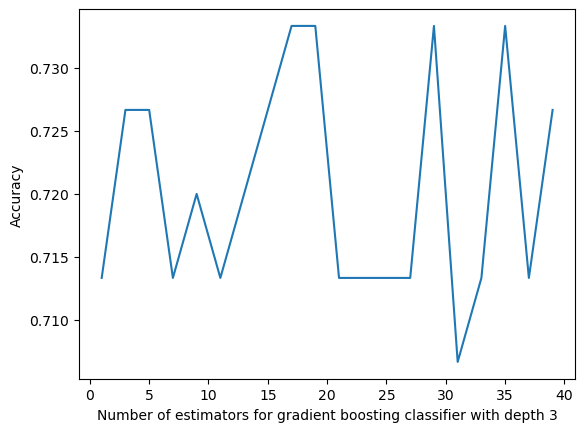

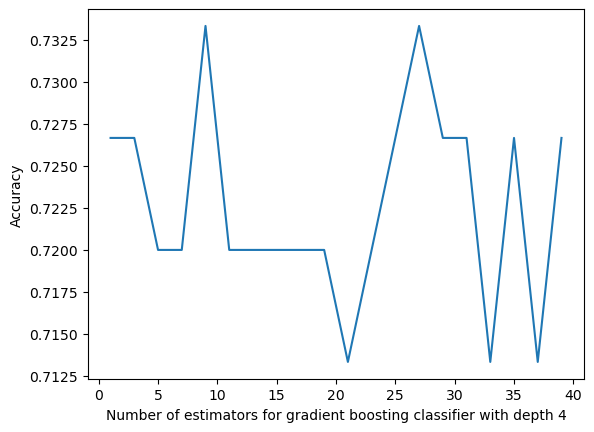

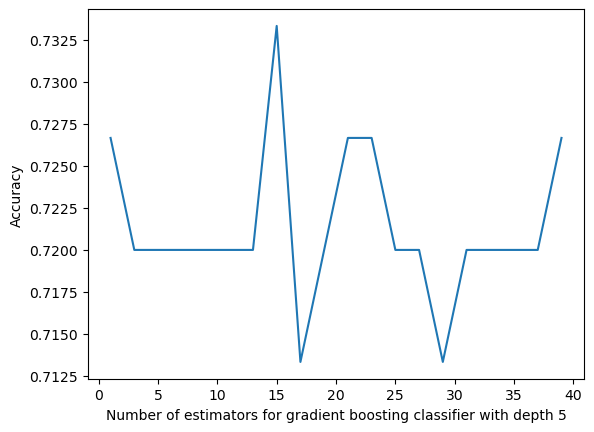

In [9]:
# task4
depth_interval = np.arange(1, 6)
number_of_estimators_interval = np.arange(1, 40, 2)
for depth in depth_interval:
    accuracy_hist = np.array([])
    for i in number_of_estimators_interval:
        classifier = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=depth, random_state=0)
        classifier = classifier.fit(X1, iris_targets)
        scores = cross_val_score(clf, iris_data, iris_targets, cv=5)
        accuracy_hist = np.append(accuracy_hist, np.array([scores.mean()]))
        # print("%0.2f accuracy with a standard deviation of %0.2f for %d estimators and max_depth %d" % (scores.mean(), scores.std(), i, depth))
    print()

    plt.xlabel(f"Number of estimators for gradient boosting classifier with depth {depth}")
    plt.ylabel("Accuracy")
    plt.plot(number_of_estimators_interval, accuracy_hist)
    plt.show()

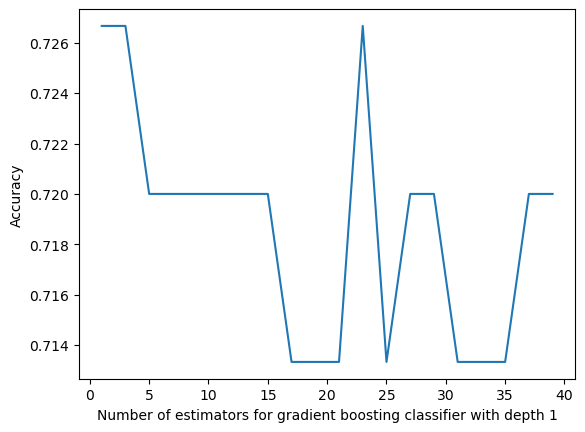

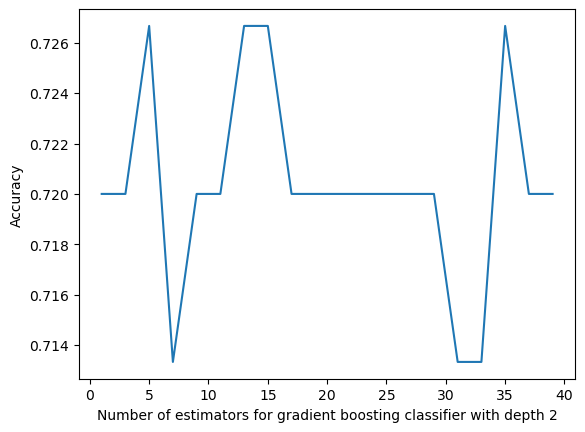

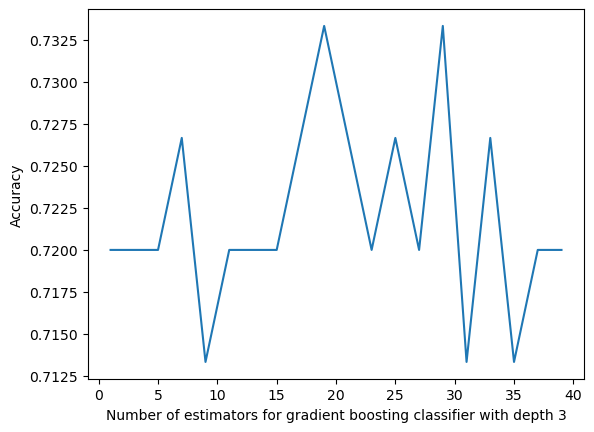

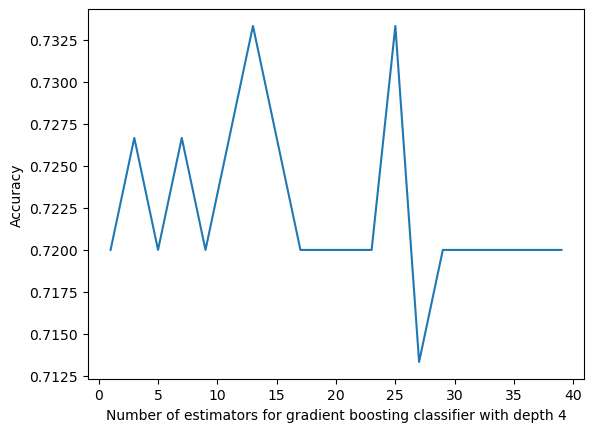

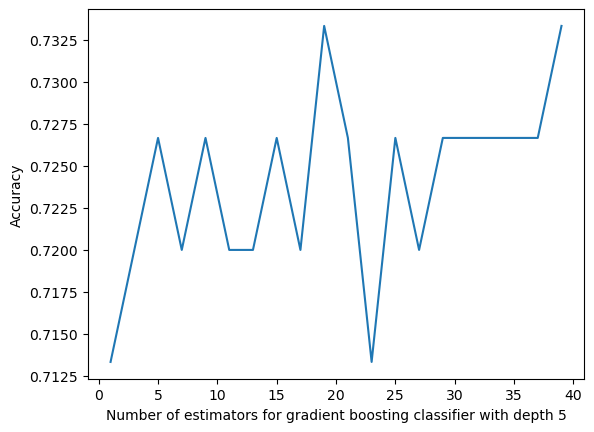

In [10]:
# task5

depth_interval = np.arange(1, 6)
number_of_estimators_interval = np.arange(1, 40, 2)
for depth in depth_interval:
    accuracy_hist = np.array([])
    for i in number_of_estimators_interval:
        classifier = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=0)
        classifier = classifier.fit(X1, iris_targets)
        scores = cross_val_score(clf, iris_data, iris_targets, cv=5)
        accuracy_hist = np.append(accuracy_hist, np.array([scores.mean()]))
        # print("%0.2f accuracy with a standard deviation of %0.2f for %d estimators and max_depth %d" % (scores.mean(), scores.std(), i, depth))
    print()

    plt.xlabel(f"Number of estimators for gradient boosting classifier with depth {depth}")
    plt.ylabel("Accuracy")
    plt.plot(number_of_estimators_interval, accuracy_hist)
    plt.show()